# SBI Life Insurance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
insurance_df = pd.read_csv('SBI_Life_insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


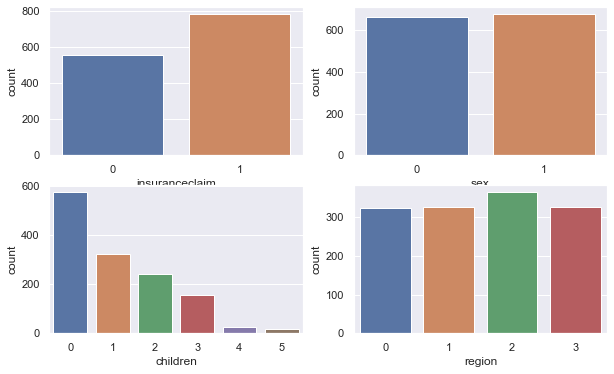

In [4]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,6))
sns.countplot(x='insuranceclaim', data= insurance_df,ax=ax[0,0])
sns.countplot(x='sex', data= insurance_df,ax=ax[0,1])
sns.countplot(x='children', data= insurance_df,ax=ax[1,0])
sns.countplot(x='region', data= insurance_df,ax=ax[1,1])
plt.show()

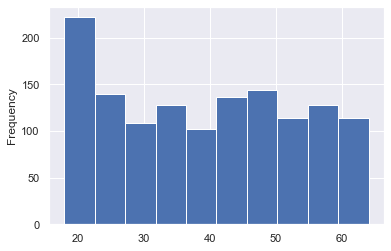

In [5]:
insurance_df['age'].plot.hist()
plt.show()

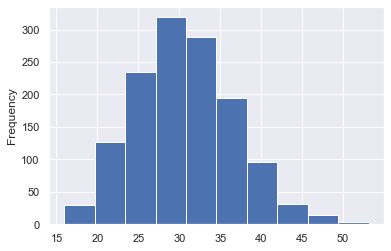

In [6]:
insurance_df['bmi'].plot.hist()
plt.show()

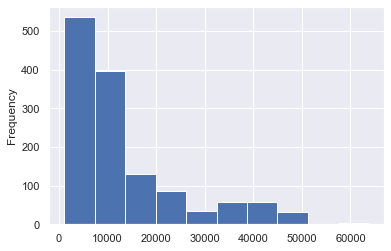

In [7]:
insurance_df['charges'].plot.hist()
plt.show()

                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

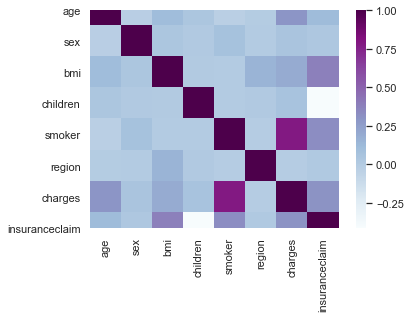

In [8]:
corr=insurance_df.corr()
print(corr)
sns.heatmap(corr,square=True,cmap="BuPu")
plt.show()

In [9]:
X = insurance_df.drop('insuranceclaim',axis=1)
y= insurance_df['insuranceclaim']
print(X.shape)
print(y.shape)

(1338, 7)
(1338,)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = logreg.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.72      0.75       157\n           1       0.83      0.87      0.85       245\n\n    accuracy                           0.81       402\n   macro avg       0.81      0.80      0.80       402\nweighted avg       0.81      0.81      0.81       402\n'

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[113,  44],
       [ 31, 214]], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8134328358208955

AUC : 0.89


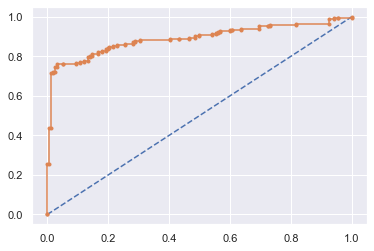

In [20]:
from sklearn.metrics import roc_curve,roc_auc_score
probs = logreg.predict_proba(X_test)
probs=probs[:,1]
auc = roc_auc_score(y_test,probs)
print('AUC : {:.2f}'.format(auc))
#calculate roc curve
fpr,tpr,thresholds = roc_curve(y_test,probs)
#plot no skill
plt.plot([0,1],[0,1],linestyle='--')
#plot roc curve
plt.plot(fpr,tpr,marker='.')
plt.show()